In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
# filename - Filename as given in marsyas dataset.
# tempo - The speed at which a passage of music is played
# beats - Rythmic unit in music
# chroma_stft- Short Time Fourier Transform
# rmse -Root Mean Square Error
# spectral_centroid -Indicates where the "center of mass" of the spectrum is located.
# spectral_bandwidth -It is the Wavelength interval in which a radiated spectral quantity is not less than half its maximum value
# rolloff - Roll-off is the steepness of a transmission function with frequency
# zero_crossing_rate - The rate at which the signal changes from positive to negative or back
# mfcc1 - Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.
# mfcc2
# mfcc3
# mfcc4
# mfcc5
# mfcc6
# mfcc7
# mfcc8
# mfcc9
# mfcc10
# mfcc11
# mfcc12
# mfcc13
# mfcc14
# mfcc15
# mfcc16
# mfcc17
# mfcc18
# mfcc19
# mfcc20
# label - Contains a string depicting the genre

In [3]:
data = pd.read_csv('../input/music-genres/data.csv')
data

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [6]:
data=data.drop('filename', axis=1)
data.head()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [7]:
data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


In [42]:
data['label'].value_counts()

pop          100
rock         100
classical    100
country      100
reggae       100
hiphop       100
disco        100
jazz         100
blues        100
metal        100
Name: label, dtype: int64

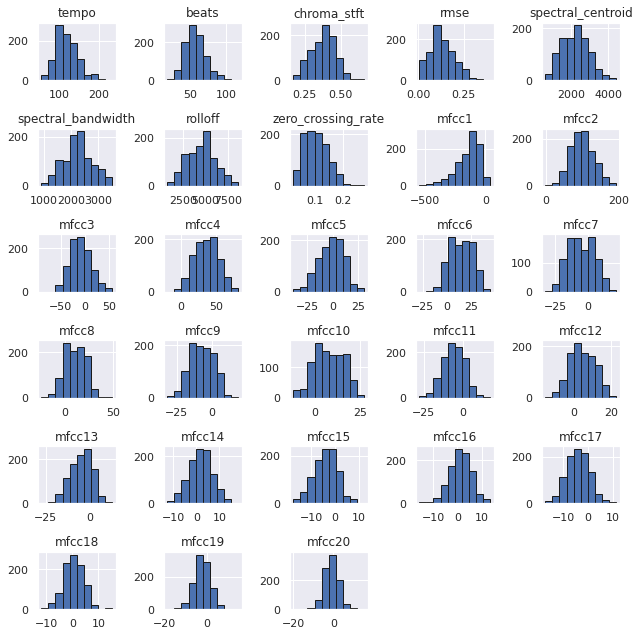

In [13]:
data.hist(figsize=(9,9), ec='k')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.decomposition import PCA # поиск линейной зависимости для понижения пространства размености
model = PCA(n_components=2)
data_2d = model.fit_transform(data.drop('label', axis=1), data['label'])

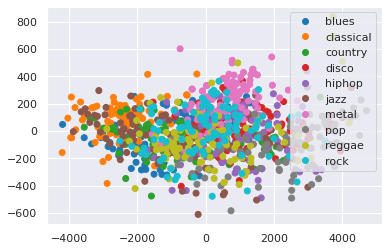

In [41]:
uniq = pd.factorize(data['label'])

scatter=plt.scatter(data_2d[:,0], data_2d[:,1], c=uniq[0], cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=list(uniq[1]))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

clf = make_pipeline(StandardScaler(),SGDClassifier())

clf.fit(x_train, y_train)
y_clf = clf.predict(x_test)
accuracy_score(y_test, y_clf)


0.585

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_2 = make_pipeline(StandardScaler(),DecisionTreeClassifier())

clf_2.fit(x_train, y_train)
y_clf_2 = clf_2.predict(x_test)
accuracy_score(y_test, y_clf_2)

0.4

In [81]:
from sklearn.svm import SVC
clf_svc = make_pipeline(StandardScaler(),SVC())

clf_svc.fit(x_train, y_train)
y_clf_svc = clf_svc.predict(x_test)
accuracy_score(y_test, y_clf_svc)

0.585

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf_buf = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=6, weights='distance'))
parameters = {'kneighborsclassifier__n_neighbors':np.arange(1, 20), 'kneighborsclassifier__weights':['uniform', 'distance']}

clf_3 = GridSearchCV(clf_buf, parameters, cv=5, verbose=51, scoring='accuracy')
clf_3.fit(data.drop('label', axis=1), data['label'])

Fitting 5 folds for each of 38 candidates, totalling 190 fits
[CV 1/5; 1/38] START kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform
[CV 1/5; 1/38] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 2/5; 1/38] START kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform
[CV 2/5; 1/38] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 3/5; 1/38] START kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform
[CV 3/5; 1/38] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5; 1/38] START kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform
[CV 4/5; 1/38] END kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5; 1/38] START kneighborsclassifier__n_neighbors=1, kneighborsclassifier__weights=uniform
[C

[CV 3/5; 9/38] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5; 9/38] START kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform
[CV 4/5; 9/38] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5; 9/38] START kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform
[CV 5/5; 9/38] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5; 10/38] START kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=distance
[CV 1/5; 10/38] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5; 10/38] START kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=distance
[CV 2/5; 10/38] END kneighborsclassifier__n_neighbors=5, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5; 10/38] START kneighborsclassi

[CV 3/5; 17/38] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5; 17/38] START kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform
[CV 4/5; 17/38] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5; 17/38] START kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform
[CV 5/5; 17/38] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5; 18/38] START kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=distance
[CV 1/5; 18/38] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5; 18/38] START kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=distance
[CV 2/5; 18/38] END kneighborsclassifier__n_neighbors=9, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5; 18/38] START kneighborsc

[CV 3/5; 25/38] END kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5; 25/38] START kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=uniform
[CV 4/5; 25/38] END kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5; 25/38] START kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=uniform
[CV 5/5; 25/38] END kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5; 26/38] START kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=distance
[CV 1/5; 26/38] END kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5; 26/38] START kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=distance
[CV 2/5; 26/38] END kneighborsclassifier__n_neighbors=13, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5; 26/38] START kn

[CV 3/5; 33/38] END kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 4/5; 33/38] START kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=uniform
[CV 4/5; 33/38] END kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 5/5; 33/38] START kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=uniform
[CV 5/5; 33/38] END kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=uniform; total time=   0.0s
[CV 1/5; 34/38] START kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=distance
[CV 1/5; 34/38] END kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 2/5; 34/38] START kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=distance
[CV 2/5; 34/38] END kneighborsclassifier__n_neighbors=17, kneighborsclassifier__weights=distance; total time=   0.0s
[CV 3/5; 34/38] START kn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=6,
                                                             weights='distance'))]),
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy', verbose=51)

In [61]:
clf_3.best_score_

0.638

In [80]:
from sklearn.model_selection import cross_val_score
clf_4 = clf_3.best_estimator_
cross_val_score(clf_4, data.drop('label', axis=1), data['label'], cv=5, scoring='accuracy').mean()

0.638